In [1]:
import pandas as pd 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score, calinski_harabasz_score


# Import data

In [3]:
df_raw = pd.read_csv("Dataset_ Levallois-Perret-2019-08.csv")

In [4]:
df_raw.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,...,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,NaN,NaN,...,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,NaN,2017-04-21T18:52:35.733,NaN
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,NaN,NaN,...,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,NaN,2019-06-06T10:08:10.89,2018-09-25
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,NaN,NaN,...,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,NaN,2019-06-13T08:22:14.314,NaN
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,NaN,NaN,...,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,NaN,2019-06-18T10:40:07.405,NaN
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,NaN,NaN,...,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,NaN,2019-06-14T15:02:18.155,2019-06-14


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2164 non-null   object 
 1   URL                         2164 non-null   object 
 2   CRAWL_SOURCE                2164 non-null   object 
 3   PROPERTY_TYPE               2164 non-null   object 
 4   NEW_BUILD                   1973 non-null   object 
 5   DESCRIPTION                 2160 non-null   object 
 6   IMAGES                      2164 non-null   object 
 7   SURFACE                     2050 non-null   float64
 8   LAND_SURFACE                3 non-null      float64
 9   BALCONY_SURFACE             0 non-null      float64
 10  TERRACE_SURFACE             25 non-null     float64
 11  ROOM_COUNT                  1835 non-null   float64
 12  BEDROOM_COUNT               696 non-null    float64
 13  BATHROOM_COUNT              0 non

# Calcul de la proportion des valeurs manquantes pour chaque colonne 

In [6]:
DF = pd.DataFrame(data=df_raw.isnull().sum()/len(df_raw),columns=['Proportion']).sort_values('Proportion',ascending=True)
display(DF)

,Proportion
ID,0.000000
LAST_CRAWL_DATE,0.000000
MARKETING_TYPE,0.000000
PRICE_EVENTS,0.000000
EXCLUSIVE_MANDATE,0.000000
DEALER_TYPE,0.000000
CITY_ID,0.000000
CITY,0.000000
PARKING,0.000000
HEATING_TYPES,0.000000


Nous constatons qu'il y a énormément de données manquantes sur les caractéristiques "physiques" des biens, autrement dit les caractéristiques qui auraient permis de comparer facilement les différents biens. 

# Réflexion sur les données pertinentes 

les données "physiques", bien qu'importantes, pourraient créer un biais énorme si elles sont prises en compte dans le modèle. 


Je m'explique: imaginons que nous les prenions en compte et remplacons les valeurs manquantes par la modalité la plus présente.
    si un même bien a été posté plusieurs fois, sur des sites différents, mais que les caractéristiques physiques n'ont pas été ajoutées dans CHAQUE annonce => nous aurions, pour un même bien, une/des annonces avec les VRAIES caractéristiques et une/des annonces avec les caractéristiques INDUITES par le preprocess

Pour éviter ce biais et simplifier le modèle, dans un premier temps, je me contenterai des colonnes avec le moins de données manquantes. 

In [7]:
#Dans un 1er temps je vais seulement garder les colonnes avec 90% de valeurs connues
liste_col = list(DF[DF['Proportion'] <= 0.1].T.columns)

In [8]:
liste_col

['ID',
 'LAST_CRAWL_DATE',
 'MARKETING_TYPE',
 'PRICE_EVENTS',
 'EXCLUSIVE_MANDATE',
 'DEALER_TYPE',
 'CITY_ID',
 'CITY',
 'PARKING',
 'HEATING_TYPES',
 'PUBLICATION_START_DATE',
 'IMAGES',
 'PROPERTY_TYPE',
 'CRAWL_SOURCE',
 'URL',
 'DEPT_CODE',
 'ZIP_CODE',
 'DESCRIPTION',
 'PRICE',
 'DEALER_NAME',
 'SURFACE',
 'PRICE_M2',
 'NEW_BUILD']

In [9]:
#Je supprime les colonnes qui ne semblent pas pertinentes
df = df_raw[liste_col].drop(['LAST_CRAWL_DATE','PRICE_EVENTS','CITY_ID','CITY','HEATING_TYPES','PUBLICATION_START_DATE','IMAGES','CRAWL_SOURCE','URL','DEPT_CODE','ZIP_CODE','DESCRIPTION','DEALER_NAME'],axis=1)

In [10]:
#Id en index
df.set_index('ID', inplace=True)

# Gestion des valeurs manquantes 

In [11]:
#affichage des vlaeurs manquantes avant pre process
pd.DataFrame(df.isnull().sum(),columns=['missing_values'])

,missing_values
MARKETING_TYPE,0
EXCLUSIVE_MANDATE,0
DEALER_TYPE,0
PARKING,0
PROPERTY_TYPE,0
PRICE,60
SURFACE,114
PRICE_M2,173
NEW_BUILD,191


In [12]:
#remplace valeurs manquantes par valeur médiane ou le mode principal 
for columns in ['PRICE','SURFACE','PRICE_M2']:
    df[columns] = df[columns].fillna(df[columns].median())

df['NEW_BUILD'] = df['NEW_BUILD'].fillna(df['NEW_BUILD'].mode()[0])


# Preprocess

In [13]:
#compte tenu du faible nombre de colonnes, le preprocess est fait manuellement, on pourrait aussi utiliser un label encoder 
df['MARKETING_TYPE'].replace(['RENT','SALE'],['1','0'],inplace=True)
df['EXCLUSIVE_MANDATE'].replace([False,True],['1','0'],inplace=True)
df['DEALER_TYPE'].replace(['AGENCY','MANDATARY','PRIVATE'],['1','0','2'],inplace=True)
df['PARKING'].replace([False,True],['1','0'],inplace=True)
df['PROPERTY_TYPE'].replace(['APARTMENT', 'PREMISES', 'HOUSE', 'PARKING', 'BUILDING'],['4','3','2','1','0'],inplace=True)
df['NEW_BUILD'].replace([False,True],['1','0'],inplace=True)

In [14]:
#affichage des vlaeurs manquantes après pre process
pd.DataFrame(df.isnull().sum(),columns=['missing_values'])

,missing_values
MARKETING_TYPE,0
EXCLUSIVE_MANDATE,0
DEALER_TYPE,0
PARKING,0
PROPERTY_TYPE,0
PRICE,0
SURFACE,0
PRICE_M2,0
NEW_BUILD,0


# Machine learning


un modèle de ML non supervisé tel que AgglomerativeClustering me semble pertinent vu notre jeu de données

In [24]:
#le modèle est entrainé pour plusieurs valeurs de n_cluster afin d'obtenir sa valeur optimale 

range_n = range(1200,2100,50)

s_scores=[]
c_scores=[]
for n in range_n:

    clf = AgglomerativeClustering(n_clusters = n)
    clf.fit(df)

    labels = clf.labels_
    s_scores.append(silhouette_score(X=df,labels=labels,metric='sqeuclidean'))
    c_scores.append(calinski_harabasz_score(X=df,labels=labels))



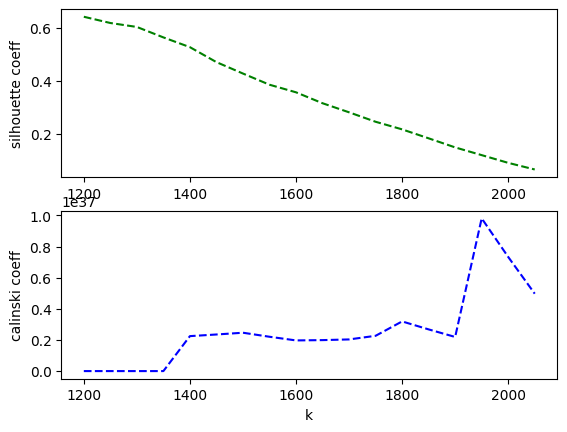

In [25]:
plt.subplot(211)
plt.plot(range_n, s_scores,'g--')
plt.ylabel('silhouette coeff')
plt.subplot(212)
plt.plot(range_n, c_scores,'b--')
plt.xlabel('k')
plt.ylabel('calinski coeff')
plt.show()

In [29]:
clf = AgglomerativeClustering(n_clusters = 1940)
pred = clf.fit_predict(df)

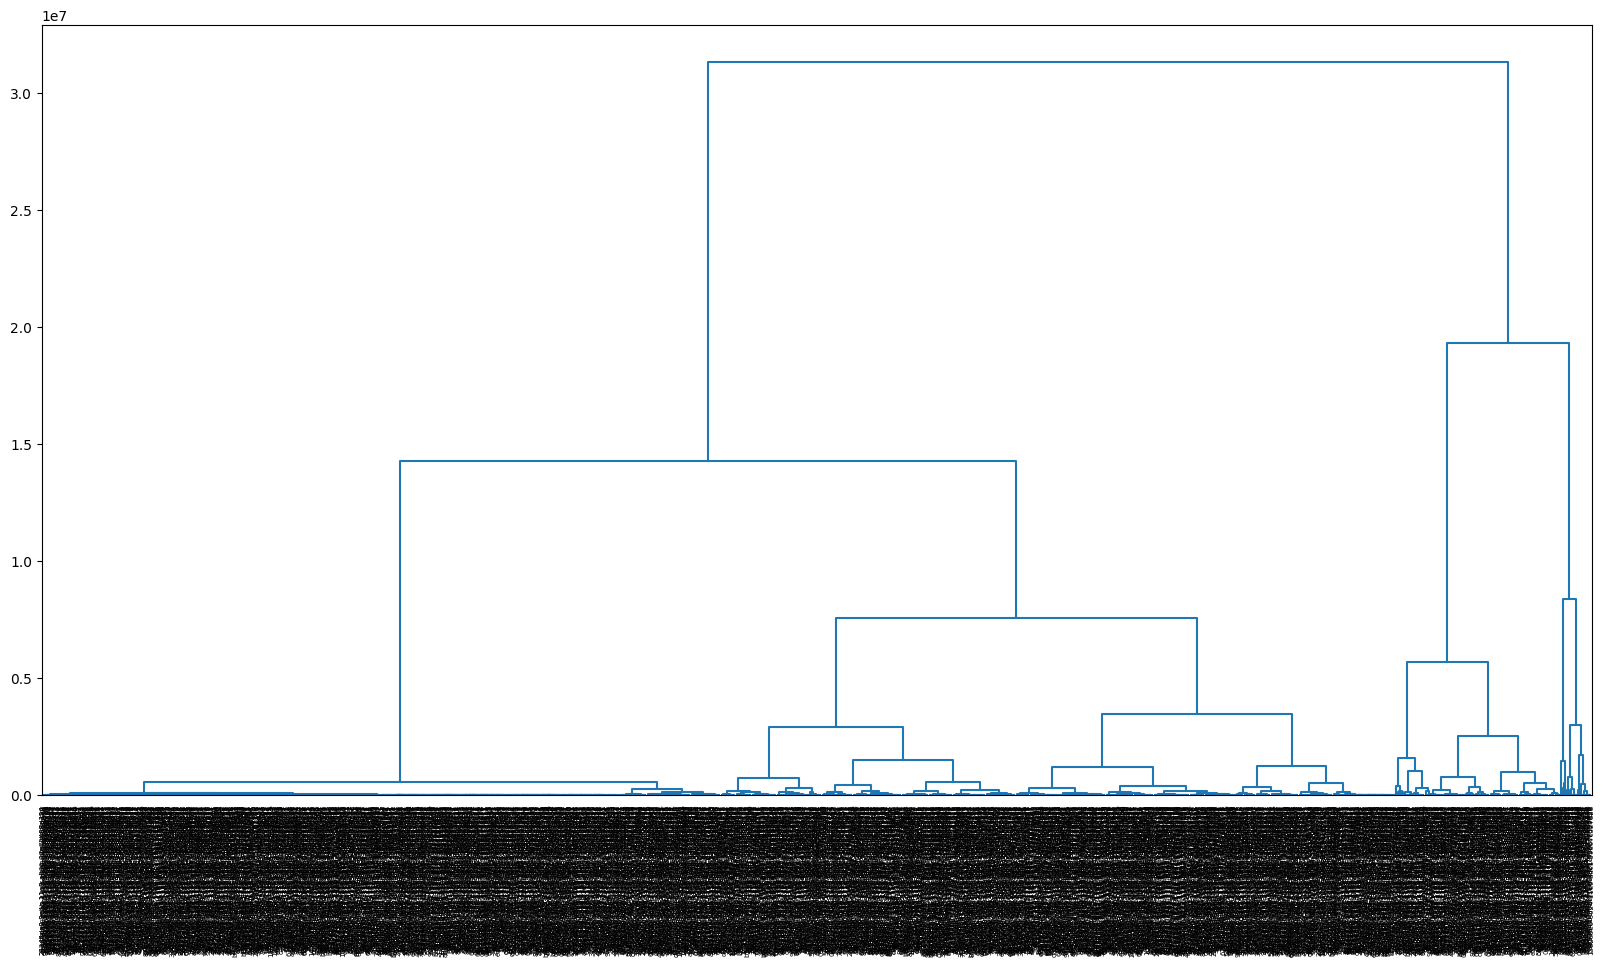

In [38]:
#peu pertinant comme visualisation vu le nombre d'apaprtements
plt.figure(figsize=(20,10))
Z = linkage(df, method ='ward', metric = 'euclidean')

dendrogram(Z,labels=df.index,leaf_rotation =90, color_threshold =0)
plt.show()

In [30]:
df['labels'] = pred
df_pred = pd.DataFrame(df['labels'].value_counts())
df_pred

,count
labels,
0,11
110,7
82,6
101,6
43,5
...,...
982,1
1102,1
1415,1


In [31]:
liste_doublons = list(df_pred[df_pred['count'] > 1].index)
print('Nous avons',len(liste_doublons) ,"biens qui ont été postés plus d'une fois" )

Nous avons 146 biens qui ont été postés plus d'une fois


In [32]:
#récupère la liste des index qui sont en doublons

index_doublons = list(df.loc[df.apply(lambda x: x.labels in liste_doublons, axis=1)].index)

# Visualisation des doublons

Visulaisons les 2 biens qui ont le plus de doublons: label 0 et 110

In [33]:
test = list(df[df['labels'] == 0].index)
df_test = df_raw[df_raw.ID.isin(test)]
df_test

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,...,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
249,d3d404c0-61f5-11e9-adc1-59e67c527828,https://www.avendrealouer.fr/location/levalloi...,A_VENDRE_A_LOUER,PARKING,NaN,Parking à louer dans un l'immeuble récent au 1...,"[""https://pix.yanport.com/ads/d3d404c0-61f5-11...",NaN,NaN,NaN,...,Impact Immo,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-18T16:20:02.942,NaN,2019-08-25T08:31:13.069,NaN
594,2b15e410-6df9-11e9-adc1-59e67c527828,https://www.avendrealouer.fr/location/levalloi...,A_VENDRE_A_LOUER,PARKING,NaN,emplacement de parking. Mise à jour le 25/06/2...,"[""https://pix.yanport.com/ads/2b15e410-6df9-11...",NaN,NaN,NaN,...,Foncia Marceau,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-05-03T23:14:13.185,NaN,2019-08-25T08:31:05.247,NaN
604,359def60-6e51-11e9-adc1-59e67c527828,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,PARKING,NaN,emplacement de parking,"[""https://pix.yanport.com/ads/359def60-6e51-11...",NaN,NaN,NaN,...,Foncia Asnières,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-05-04T09:44:26.224,NaN,2019-08-24T23:13:18.931,NaN
619,8f5630d0-6235-11e9-adc1-59e67c527828,https://www.bienici.com/annonce/pericles-24805346,BIEN_ICI,PARKING,NaN,LEVALLOIS - PARKING SECURISE Proche des quais ...,"[""http://photo3.pericles.fr/photo_get.php?S1=3...",NaN,NaN,NaN,...,Imax Levallois-Perret,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-18T22:35:12.076,NaN,2019-08-25T03:17:38.73,NaN
682,3be77c60-9cb9-11e9-ab3e-47ec2b68d334,https://www.avendrealouer.fr/location/levalloi...,A_VENDRE_A_LOUER,PARKING,NaN,LEVALLOIS - PARKING SECURISE Proche des quais ...,"[""https://cf-medias.avendrealouer.fr/image/_11...",NaN,NaN,NaN,...,Imax Levallois-Perret,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-02T11:04:51.981,NaN,2019-08-23T22:21:23.454,NaN
721,e8036580-623b-11e9-adc1-59e67c527828,https://www.logic-immo.com/detail-location-814...,LOGIC_IMMO,PARKING,NaN,LEVALLOIS - PARKING SECURISE Proche des quais ...,"[""https://mmf.logic-immo.com/mmf/ads/photo-pro...",NaN,NaN,NaN,...,Imax Levallois-Perret,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-19T00:41:43.99,NaN,2019-08-12T23:28:50.453,NaN
746,b6c76040-620c-11e9-adc1-59e67c527828,https://www.seloger.com/annonces/locations/par...,SE_LOGER,PARKING,NaN,LEVALLOIS - PARKING SECURISE Proche des quais ...,"[""https://pix.yanport.com/ads/b6c76040-620c-11...",NaN,NaN,NaN,...,Imax Levallois-Perret,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-18T19:03:54.149,NaN,2019-08-06T17:21:59.016,NaN
805,04f1d310-a560-11e7-bf15-831035485042,https://www.avendrealouer.fr/location/levalloi...,A_VENDRE_A_LOUER,PARKING,NaN,"Box à Louer rue Marius Aufan à Levallois, Hono...","[""https://cf-medias.avendrealouer.fr/image/_91...",NaN,NaN,NaN,...,Agence Impact Rivay Locations,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-09-29T21:49:06.106,NaN,2019-03-28T18:41:21.899,2017-11-20
820,75a1b970-61c7-11e9-8084-55ce2049f05c,https://www.leboncoin.fr/locations/1602202812.htm,LE_BON_COIN,PARKING,NaN,PARKING A LOUER RUE MARIUS AUFAN (immeuble séc...,"[""https://pix.yanport.com/ads/75a1b970-61c7-11...",NaN,NaN,NaN,...,Impact Immo,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-18T10:48:05.085,NaN,2019-07-02T19:20:13.493,NaN
865,0dbf6c50-6dc3-11e9-adc1-59e67c527828,https://www.seloger.com/annonces/locations/par...,SE_LOGER,PARKING,NaN,Emplacement de parking. Honoraires TTC en sus ...,"[""https://pix.yanport.com/ads/0dbf6c50-6dc3-11...",NaN,NaN,NaN,...,Foncia Asnières,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-05-03T16:46:52.149,NaN,2019-08-18T01:46:32.327,NaN


Dans le cas des parkings, les données ne sont pas assez détaillées pour faire la différence entre les doublons où si nous sommes en présence d'une batterie de garage

In [39]:
test2 = list(df[df['labels'] == 110].index)
df_test2 = df_raw[df_raw.ID.isin(test2)]
df_test2

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,...,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
406,7b145440-9128-11e9-8a42-a16638394d93,https://www.leboncoin.fr/ventes_immobilieres/1...,LE_BON_COIN,APARTMENT,False,Appartement de 3 pièces principales\n\n52m² au...,"[""https://pix.yanport.com/ads/7b145440-9128-11...",52.0,NaN,NaN,...,Bourse De L Immobilier,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-06-17T17:18:07.819,NaN,2019-08-01T15:48:51.468,NaN
718,3919a320-91f4-11e9-bc97-e75542746f87,https://www.logic-immo.com/detail-vente-12c015...,LOGIC_IMMO,APARTMENT,False,"52m² au 4eme et dernier sans ascenseur, tout l...","[""https://mmf.logic-immo.com/mmf/ads/photo-pro...",52.0,NaN,NaN,...,Bourse De L'immobilier,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-06-18T15:09:17.722,NaN,2019-08-12T12:28:33.996,NaN
1244,416fb250-9193-11e9-8a42-a16638394d93,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,False,"52m² au 4eme et dernier sans ascenseur, tout l...","[""http://www.bourse-immobilier.fr/jpg/189-1497...",52.0,NaN,NaN,...,Bourse De L'immobilier,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-06-18T06:35:23.493,NaN,2019-08-24T15:03:21.33,NaN
1475,9a407830-9123-11e9-a7f2-f5443208fc78,https://www.seloger.com/annonces/achat/apparte...,SE_LOGER,APARTMENT,False,"52m² au 4ème et dernier sans ascenseur, tout l...","[""https://pix.yanport.com/ads/9a407830-9123-11...",52.0,NaN,NaN,...,Bourse De L'immobilier,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-06-17T17:16:09.122,NaN,2019-08-01T15:40:43.534,NaN
1983,3c8609a0-9171-11e9-8a42-a16638394d93,https://www.lux-residence.com/fr/vente/apparte...,LUX_RESIDENCE,APARTMENT,False,"52m² au 4eme et dernier sans ascenseur, tout l...","[""https://mmf.lux-residence.com/mmf/ads/2d7/6/...",52.0,NaN,NaN,...,Bourse De L'immobilier,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-06-18T02:31:44.24,NaN,2019-08-24T09:16:06.941,NaN
1996,28ccbf00-91f6-11e9-bc97-e75542746f87,https://www.avendrealouer.fr/vente/levallois-p...,A_VENDRE_A_LOUER,APARTMENT,False,"52m² au 4eme et dernier sans ascenseur, tout l...","[""https://cf-medias.avendrealouer.fr/image/_11...",52.0,NaN,NaN,...,Bourse De L Immobilier,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-06-18T16:22:58.816,NaN,2019-08-04T19:32:54.596,NaN
2024,f7abd550-91e6-11e9-a7f2-f5443208fc78,https://proprietes.lefigaro.fr/annonces/appart...,PROPRIETES_DE_FRANCE,APARTMENT,False,"52m² au 4eme et dernier sans ascenseur, tout l...",[],52.0,NaN,NaN,...,Bourse De L'immobilier,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-06-18T10:44:40.109,NaN,2019-08-17T02:03:18.755,NaN


Les annonces semblent bien décrire le même bien

# Conclusion

Le modèle semble montrer qu'il y a peu de doublons (146), ce qui peut sembler étonnant compte tenu du nombre de biens généralements postés sur plusieurs sites à la fois. Ce nombre bas peut provenir du nombre de cluster élevé choisi pour le modèle (1950).


Un travail plus approfondi devra être fait sur le choix de n_clusters ainsi que sur les variables d'entrainement, ici seules celles ayant le moins de valeurs manquantes on été sélectionnées. 

# Pistes pour améliorer le modèle

Tout d'abord, l'on pourrait se servir des descriptions des biens afin d'extraire les mots clefs, telle que les quartiers, noms de parcs, noms des rues, places, mairie et autres pour qu'ils soient pris en compte dans le modèle.

Nous pourrions aussi créer un modèle qui récupère et compare les différentes photos. 

Demander à ceux qui postent les annonces de faire un effort et mettre plus d'informations sur les biens. 